<a href="https://colab.research.google.com/github/tafat1566/Probleme-du-sac-dos/blob/main/ProblmeDuSacADos7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import random
import matplotlib.pyplot as plt
from statistics import *
import seaborn as sns
import numpy as np

**Cette fonction permet de générer aléatoirement un diction qui se compose de :**
* Nom de l'objet
* Valeur de l'objet
* Masse de l'objet

In [2]:
 
def GenererDic(n):
  
  dic1=[{"nom":str(0),"valeur":str(random.randint(100,500)),"masse":str(random.randint(1,100))}]
  dicv=[]
  for i in range(n):
    dic1=[{"nom":str(i),"valeur":str(random.randint(100,500)),"masse":str(random.randint(1,100))}]
    dicv=dicv+dic1
  return dicv



In [6]:
k=[{"nom":"A", "valeur":"1", "masse":"1"},{"nom":"B", "valeur":"6", "masse":"2"},{"nom":"C", "valeur":"10", "masse":"3"},{"nom":"D", "valeur":"16", "masse":"5"}]       

In [7]:
len(k)

4

In [5]:
for i in range (4):
  print(eval(k[i]["masse"]))

1
2
3
5


**La fonction Ajout_Ratio():**
  Permet de calculer la l'utilité massique ui/mi et de le rajouter a notre dictionnaire 


In [8]:
#on rajoute a notre liste_objets le ratio ui/mi
def Ajout_Ratio(liste_objets):
  for objet in liste_objets:
    objet["u_m"]=eval(objet["valeur"])/eval(objet["masse"])
  return liste_objets

**Cette fonction permet d'effectuer les tests unitaire**

In [ ]:
def TestU(Pt,Capacite,liste_objets):

  for objet in liste_objets:
    assert eval(objet["masse"])<0, 'la masse ne pas être inferieur à zero'
  assert Pt>Capacite,'La somme des poids dans le sac ne doit pas depassé la capacité du sac'


**Solution approchée - Algorithme glouton**

In [ ]:
# Solution approchée - Algorithme glouton
def sacADos_naif(capacite, liste_objets):
  
    poids_total=0
    i=0
    Ajout_Ratio(liste_objets)
    #Trier la liste des objets selon l'utilité massique en utilisant la fonction sorted
    
    liste_objets_T = sorted(liste_objets, key=lambda x: x["u_m"])

    #Inverser la liste triée (ordre décroissant)
    liste_objets_T.reverse()


    Objets_selection = []
    poids_total = 0
    n= len(liste_objets_T)
    for i in range(n):
        if eval(liste_objets_T[i]["masse"]) + poids_total <= capacite:
          poids_total +=eval(liste_objets_T[i]["masse"])
          Objets_selection.append((liste_objets_T[i]))
    return poids_total,( Objets_selection)
            

**Méthode Brute orce** 

In [ ]:
# Solution force brute - Recherche de toutes les solutions
def sacADos_force_brute(capacite, elements, elements_selection = []):
  # condition d'arret, s'il n'y a aucun élément à traitre 
    if elements:
      # on va pas rjouter l'élément courant 
        val1, lstVal1 = sacADos_force_brute(capacite, elements[1:], elements_selection)
        val = elements[0]
        if eval(val["masse"]) <= capacite:
            val2, lstVal2 = sacADos_force_brute(capacite - eval(val["masse"]), elements[1:], elements_selection + [val])
            if val1 < val2:
                return val2, lstVal2

        return val1, lstVal1
    else:
        return sum([eval(i["masse"])for i in elements_selection]), elements_selection
      



**Méthode de programation dynamique**

In [ ]:
def sacADos_dynamique(capacite, elements):
    matrice = [[0 for x in range(capacite + 1)] for x in range(len(elements) + 1)]
    #matrice=np.zeros((capacite + 1,len(elements) + 1))
    #print(matrice)
    for i in range(1, len(elements) + 1):
        for w in range(1, capacite + 1):
            if eval(elements[i-1]["masse"]) <= w:
                matrice[i][w] = max(eval(elements[i-1]["valeur"]) + matrice[i-1][w-eval(elements[i-1]["masse"])], matrice[i-1][w])
            else:
                matrice[i][w] = matrice[i-1][w]

    # Retrouver les éléments en fonction de la somme
    #print(matrice)
    w = capacite
    n = len(elements)
    elements_selection = []

    while w >= 0 and n >= 0:
        e = elements[n-1]
        if matrice[n][w] == matrice[n-1][w-eval(e["masse"])] + eval(e["valeur"]):
            elements_selection.append(e)
            w -= eval(e["masse"])

        n -= 1

    return sum([eval(i["masse"])for i in elements_selection]),elements_selection

**Tests de validitées et tests unitaires**

Cette fonction permet de tester la correction et l'effecacité des resultats


In [ ]:
def TestsValiditees(PoidsMax,liste_objets):
  
  Pn,RNaif=sacADos_naif(PoidsMax,liste_objets)
  Pb,RBF=sacADos_force_brute(PoidsMax,liste_objets)
  Pd,RDy=sacADos_dynamique(PoidsMax,liste_objets)

  print("Poid total des Objets choisit par Algo Naif--->",Pn,",Liste des objets:",Pn,RNaif)
  print("Poid total des Objets choisit par Algo Brut Force--->",Pb,",Liste des objets:",RBF)
  print("Poid total des Objets choisitpar Algo dynamique--->",Pd,",Liste des objets choisit:",RDy)
  
  #Tests Unitaires

  assert len(liste_objets) != 0,'La liste dobjets ne doit pas etre vide'
  for objet in liste_objets:
    assert eval(objet["masse"])>0, 'la masse ne pas être inferieur à zero'
  assert Pn<PoidsMax or Pb<PoidsMax or Pb<PoidsMax ,'La somme des poids dans le sac ne doit pas depassé la capacité du sac'
  assert Pn<Pb,'Algo de brute force nest pas efficace' 
  assert Pn<Pd,'Algo de dynamique nest pas efficace' 




In [ ]:
x=GenererDic(5)

In [ ]:
TestsValiditees(7,k)

Poid total des Objets choisit par Algo Naif---> 6 ,Liste des objets: 6 [{'nom': 'C', 'valeur': '10', 'masse': '3', 'u_m': 3.3333333333333335}, {'nom': 'B', 'valeur': '6', 'masse': '2', 'u_m': 3.0}, {'nom': 'A', 'valeur': '1', 'masse': '1', 'u_m': 1.0}]
Poid total des Objets choisit par Algo Brut Force---> 7 ,Liste des objets: [{'nom': 'B', 'valeur': '6', 'masse': '2', 'u_m': 3.0}, {'nom': 'D', 'valeur': '16', 'masse': '5', 'u_m': 3.2}]
Poid total des Objets choisitpar Algo dynamique---> 7 ,Liste des objets choisit: [{'nom': 'D', 'valeur': '16', 'masse': '5', 'u_m': 3.2}, {'nom': 'B', 'valeur': '6', 'masse': '2', 'u_m': 3.0}]


In [ ]:
def ListXYN(n,k):

  x=[]
  y=[]
  #k=n
  for i in range (n):
  
    liste_objets=(GenererDic(k))
    start_time = time.time()
    sacADos_naif(k, liste_objets)
    end_time=time.time()
    k=k+100
    y.append(end_time-start_time)
    x.append(k)
    #print("Naif",end_time-start_time)
  return x,y
  



In [ ]:
def ListXYB(n,k):

  x=[]
  y=[]
  for i in range (n):
  
    liste_objets=(GenererDic(k))
    start_time = time.time()
    #sacADos_naif(k, liste_objets)
    sacADos_force_brute(k,liste_objets)
    end_time=time.time()
    k=k+10
    y.append(end_time-start_time)
    x.append(k)
    #print("Brute Force *****",end_time-start_time)
  return x,y
  



In [ ]:
def ListXYD(n,k):

  x=[]
  y=[]
  #k=n
  for i in range (n):
  
    liste_objets=(GenererDic(k))
    start_time = time.time()
    #sacADos_naif(k, liste_objets)
    #sacADos_force_brute(6,liste_objets)
    sacADos_dynamique(k, liste_objets)
    end_time=time.time()
    k=k+100
    y.append(end_time-start_time)
    x.append(k)
    #print("Dy--->",end_time-start_time)
  return x,y
  


**Fonction Graphe permet d'afficher un graphe ***

In [ ]:
def Graphe(x,y):
  sns.set_theme(style="whitegrid")
  ax=sns.lineplot(x,y)
  ax.set(xlabel=' taille du problème', ylabel='temps dexecution')

**Graphe represnte algorithme de Glouton  en fonction de la taille et le temps d'execution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


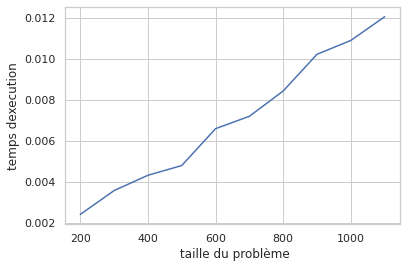

In [ ]:
Nombre_it=10
# Taille de la liste au début
T_Liste=100

x,y=ListXYN(Nombre_it,T_Liste)
Graphe(x,y)

**Graphe represnte algorithme de Brute Force  en fonction de la taille et le temps d'execution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


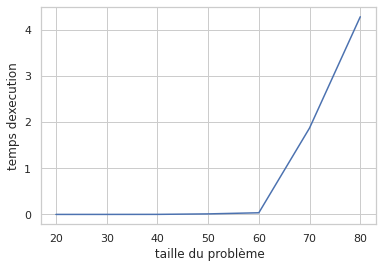

In [ ]:
Nombre_it=7
# Taille de la liste au début
T_Liste=10
bx,by=ListXYB(Nombre_it,T_Liste)
Graphe(bx,by)

**Graphe represente algorithme prog dynamique en fonction de la taille et le temps d'execution**

Dy---> 0.08902859687805176
Dy---> 0.4351997375488281
Dy---> 1.0397183895111084
Dy---> 1.914712905883789
Dy---> 2.945312023162842
Dy---> 4.34386420249939
Dy---> 5.955500602722168
Dy---> 7.840635299682617
Dy---> 9.94585132598877
Dy---> 12.323992729187012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


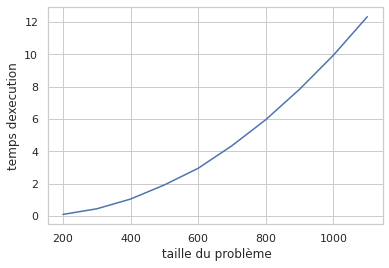

In [ ]:
Nombre_it=10
# Taille de la liste au début
T_Liste=100
dx,dy=ListXYD(Nombre_it,T_Liste)
Graphe(dx,dy)